<a href="https://colab.research.google.com/github/talesnsantos/WordCloud-using-Harry-Potter-Book/blob/main/Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##instalando Bibliotecas

In [ ]:
!pip install PyPDF2
!pip install textract
!pip install wordcloud
!pip install nltk

##Importando Bibliotecas

In [ ]:
import nltk
nltk.download('stopwords')

In [101]:
import matplotlib.pyplot as plt
import textract
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
from nltk.corpus import stopwords
import requests

## Importando Livro

In [102]:
text = textract.process('/content/drive/MyDrive/Data Science/WordCloud/Harry Potter and the Sorcerers Stone.pdf', method='pdfminer').decode('UTF-8')


## Limpando Base


In [115]:

text = text.replace("\n"," ")
text = text.replace("\x0c", "")
text[:1000]

"Harry Potter and the Sorcerer's Stone CHAPTER ONE  THE BOY WHO LIVED  Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much They were the last people you'd expect to be involved in anything strange or mysterious because they just didn't hold with such nonsense  Mr Dursley was the director of a firm called Grunnings which made drills He was a big beefy man with hardly any neck although he did have a very large mustache Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere  The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it They didn't think they could bear it if anyone found out about the Potters Mrs Potter was Mrs Dursley'

### complementando as STOPWORDS

In [104]:
Common_Words = requests.get(
    "https://gist.githubusercontent.com/deekayen/4148741/raw/98d35708fa344717d8eee15d11987de6c8e26d7d/1-1000.txt").text.split("\n")

print("antes: ", len(Common_Words))



for i in STOPWORDS:
  if i not in Common_Words:
    Common_Words.append(i)

for i in list(stopwords.words('english')):
  if i not in Common_Words:
    Common_Words.append(i)
print("depois: ",len(Common_Words))



antes:  1000
depois:  1114


In [ ]:
Common_Verbs = requests.get(
    "https://raw.githubusercontent.com/monolithpl/verb.forms.dictionary/master/csv/verbs-all.csv").text.rstrip()


Common_Verbs = Common_Verbs.replace('\n', ' ')
Common_Verbs = Common_Verbs.replace('\r', ' ')
Common_Verbs = Common_Verbs.replace('\t', ' ')

Common_Verbs = Common_Verbs.split(' ')
Common_Verbs

### Removendo characteres especiais

In [107]:
chars_Specials = set(i for i in text if not i.isalnum())
chars_Specials.remove(" ")
chars_Specials.remove("'")
chars_Specials

{'!', '"', '(', ')', '*', ',', '-', '.', ':', ';', '?', '\\', '~'}

In [116]:
text = ''.join(i for i in text if i not in chars_Specials)
text[:1000]

"Harry Potter and the Sorcerer's Stone CHAPTER ONE  THE BOY WHO LIVED  Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much They were the last people you'd expect to be involved in anything strange or mysterious because they just didn't hold with such nonsense  Mr Dursley was the director of a firm called Grunnings which made drills He was a big beefy man with hardly any neck although he did have a very large mustache Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere  The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it They didn't think they could bear it if anyone found out about the Potters Mrs Potter was Mrs Dursley'

### Removendo as STOPWORDS e Verbos comuns do texto



In [ ]:
text_tokens = text.split(" ")
text_tokens = [i for i in text_tokens if i.lower() not in Common_Words]
text_tokens = [i for i in text_tokens if i not in Common_Verbs]

text_tokens[:100]

In [114]:
final_text = ' '.join(text_tokens)
final_text[:1000]

"Harry Potter Sorcerer's CHAPTER LIVED Mr Mrs Dursley Privet proud perfectly normal anything mysterious nonsense Mr Dursley director Grunnings beefy hardly although mustache Mrs Dursley blonde nearly twice useful neighbors Dursleys Dudley opinion finer anywhere Dursleys everything secret greatest somebody anyone Potters Mrs Potter Mrs Dursley's years Mrs Dursley goodfornothing unDursleyish Dursleys neighbors Potters Dursleys Potters another Potters away Dudley Mr Mrs Dursley Tuesday cloudy outside mysterious things Mr Dursley Mrs Dursley away happily Dudley None tawny owl Mr Dursley briefcase Mrs Dursley Dudley goodbye 1 Dudley tantrum cereal tyke Mr Dursley four's something peculiar Mr Dursley around tabby Privet Mr Dursley Mr Dursley around Privet Mr Dursley something strangely Mr Dursley funny getups stupid weirdos excitedly Mr Dursley older emeraldgreen Mr Dursley probably silly obviously something later Mr Dursley Grunnings Mr Dursley ninth harder owls ing daylight owl owl overhea

##criando a WordCloud


In [111]:
mask = np.array(Image.open(
    "/content/drive/MyDrive/Data Science/WordCloud/new img/harry-potter-and-the-deathly-hallows.jpg"
))

wordcloud = WordCloud(
                # width = 700,
                # height = 700,
                scale=10,
                background_color ='black',
                #contour_color='white',
                #contour_width=1,
                colormap='rainbow',
                max_font_size=500,
                min_font_size=2,
                max_words=10000,
                mask=mask).generate(final_text)

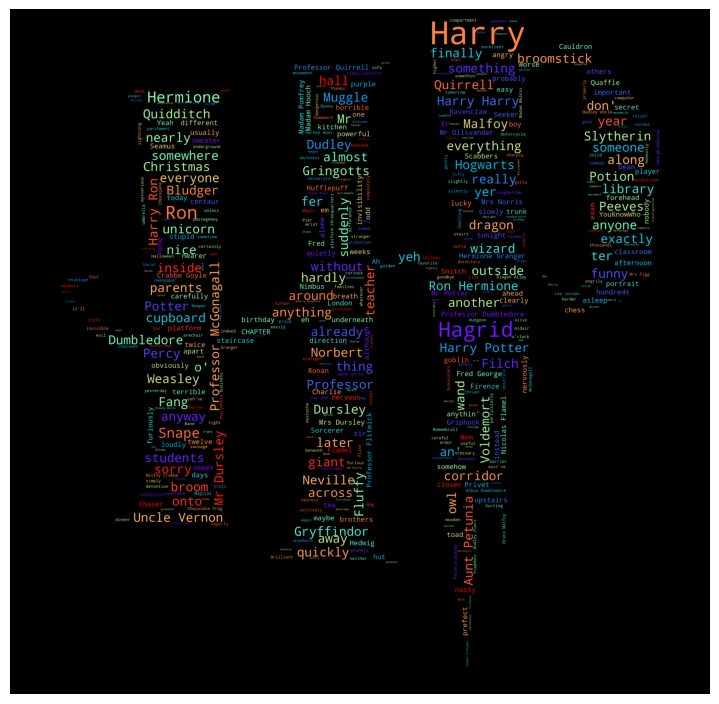

<Figure size 640x480 with 0 Axes>

In [112]:
# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None),
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
plt.savefig("img-harry-potter-and-the-chamber-of-secret-INVERT")